In [49]:
# import required packages-

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.font_manager as fnt
from mplsoccer import VerticalPitch

In [97]:
# Set input paramaters such as titles, colours and squad file.abs

team_name = "Aberdeen"

season_start = 2025

squadfile = 'aberdeen.csv'

formation ='4231' # set formation to match formations available in mplsoccer library which can be found here: https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_formations.html

colours = {
    "cl_background":"#000000",
    "cl_foreground":"#FFFFFF",
    "cl_secondary":"#999999",
    "cl_alt_1":"#d61f34",
    "cl_alt_2":"#3A86FF",
    "cl_alt_3":"#FFBE0B",
    "cl_alt_4":"#3EC300",
    "cl_alt_5":"#595959"}


title = "Squad depth for " + team_name + " season starting " + str(season_start) 
subtitle = "On basis of current date: " + datetime.datetime.now().strftime("%d/%m/%Y") + ". Primary expected position."

# Set Fonts
title_font = fnt.FontProperties(family="P052")
body_font = fnt.FontProperties(family="URW Gothic")

In [90]:
# read in and dispaly header of squad csv file

squad = pd.read_csv(squadfile)

squad.head()

,First Name,Last Name,Date of Birth,Position,Contract Expiry,Status
0,Dimitar,Mitov,22/01/1997,GK,2027,N
1,Ross,Doohan,29/03/1998,GK,2025,N
2,Tom,Ritchie,27/01/2003,GK,2025,N
3,Kristers,Tobers,13/12/2000,RCB,2028,N
4,Alfie,Dorrington,20/04/2005,RCB,2025,I


In [35]:
def calculate_age(born, season_start):
    born_date = pd.to_datetime(born)
    start_date = datetime.datetime(season_start, 8,1)
    age = start_date.year - born_date.year - ((start_date.month, start_date.day) < (born_date.month, born_date.day))
    return age

In [95]:
# Calcualte age and contract length at start of season in question

squad["Date of Birth"] = pd.to_datetime(squad["Date of Birth"])
#squad["Age"] = calculate_age(squad["Date of Birth"],season_start)
squad["Years Remaining"] = squad["Contract Expiry"] - season_start

squad.loc[squad["Years Remaining"] == 1, "Status"] = "E"

In [12]:
# Setup pitch

pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box', 
    half=False, 
    pitch_color=colours["cl_background"], 
    line_color=colours["cl_foreground"],
    linewidth=.75
    )


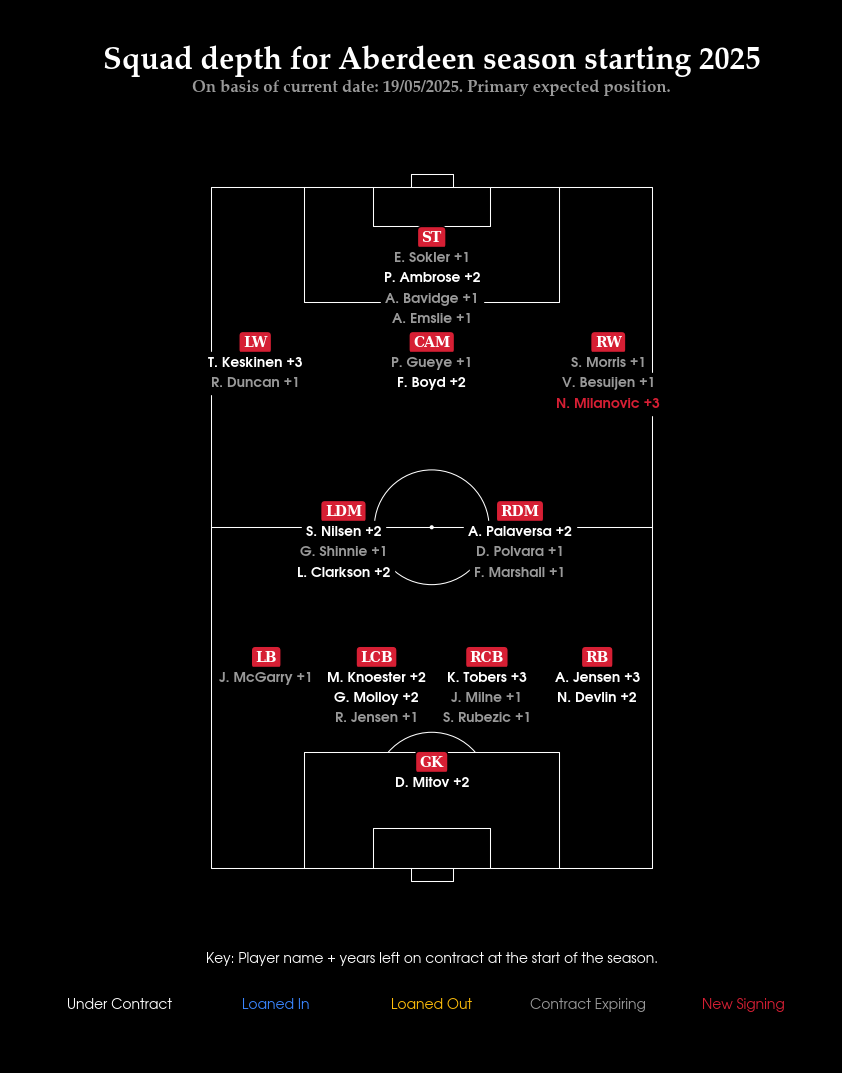

In [98]:
fig = plt.figure(figsize=(780/100,1024/100))
fig.patch.set_facecolor(colours["cl_background"])

# Add axis for header section, key and pitch
ax1 = fig.add_axes([0, 0.85, 1, .15], facecolor=colours["cl_background"])
ax2 = fig.add_axes([0, 0.15, 1, .7])
ax3 = fig.add_axes([0, 0, 1, .15], facecolor=colours["cl_background"])


# Place header, subheader and keys
ax1.text(
    x=0.5, 
    y=.65, 
    s=title, 
    fontsize=22, 
    fontproperties=title_font, 
    fontweight='bold', 
    color=colours["cl_foreground"], 
    ha='center'
)

ax1.text(
    x=0.5, 
    y=.5, 
    s=subtitle, 
    fontsize=12, 
    fontproperties=title_font, 
    fontweight='bold', 
    color=colours["cl_secondary"], 
    ha='center'
)

ax3.text(
    x=0.5, 
    y=.5, 
    s='Key: Player name + years left on contract at the start of the season.', 
    fontsize=10, 
    fontproperties=body_font,  
    color=colours["cl_foreground"], 
    ha='center'
)


plot_key = {
    'Under Contract': colours["cl_foreground"],
    'Loaned In':colours["cl_alt_2"],
    'Loaned Out':colours["cl_alt_3"],
    'Contract Expiring': colours["cl_secondary"],
    'New Signing':colours["cl_alt_1"]
}


i = 0

for key, key_colour in plot_key.items():

    ax3.text(
        x=0.1+i, 
        y=.2, 
        s=key, 
        fontsize=10, 
        fontproperties=body_font,   
        color=key_colour, 
        ha='center'
    )

    i = i+0.2

# Draw squad

status_colours = {
    'N': colours["cl_foreground"],
    'I':colours["cl_alt_2"],
    'O':colours["cl_alt_3"],
    'E': colours["cl_secondary"],
    'S':colours["cl_alt_1"]
}

pitch.draw(ax=ax2)

for row in pitch.formations_dataframe[pitch.formations_dataframe["formation"]==formation].iterrows():
    
    if row[1]["name"] in ["RDM"] :

            ax2.text(
                x=row[1]["y"],
                y=row[1]["x"]+10, # Shift DMs forward to allow space for names.
                s=row[1]["name"],
                color=colours["cl_foreground"],
                bbox=dict(boxstyle="round", fc=colours["cl_alt_1"]),
                fontsize=10,
                fontproperties=title_font,  
                fontweight='bold',
                family='serif',
                ha='center',
                va='center'
            )

            # Iterate Through Squad List at Position and Plot Names.

            for player in enumerate(squad[squad["Position"]=="RDM"].iterrows()):
                
                # Create String of Name and Years Remaining
                label = player[1][1]["First Name"][:1] + ". " +player[1][1]["Last Name"] + " +" + str(player[1][1]["Years Remaining"])
                
                ax2.text(
                x=row[1]["y"],
                y=row[1]["x"]+10-(3*(player[0]+1)) , # Shift player name box down.
                s=label,
                color=status_colours[player[1][1]["Status"]],
                bbox=dict(boxstyle="square", fc=colours["cl_background"]),
                fontsize=10,
                fontproperties=body_font,  
                fontweight='bold',
                ha='center',
                va='center'
            )

    elif row[1]["name"] in ["LDM"] :

            ax2.text(
                x=row[1]["y"],
                y=row[1]["x"]+10, # Shift DMs forward to allow space for names.
                s=row[1]["name"],
                color=colours["cl_foreground"],
                bbox=dict(boxstyle="round", fc=colours["cl_alt_1"]),
                fontsize=10,
                fontproperties=title_font,  
                fontweight='bold',
                family='serif',
                ha='center',
                va='center'
            )

            # Iterate Through Squad List at Position and Plot Names.

            for player in enumerate(squad[squad["Position"]=="LDM"].iterrows()):
                
                # Create String of Name and Years Remaining
                label = player[1][1]["First Name"][:1] + ". " +player[1][1]["Last Name"] + " +" + str(player[1][1]["Years Remaining"])
                
                ax2.text(
                x=row[1]["y"],
                y=row[1]["x"]+10-(3*(player[0]+1)) , # Shift player name box down.
                s=label,
                color=status_colours[player[1][1]["Status"]],
                bbox=dict(boxstyle="square", fc=colours["cl_background"]),
                fontsize=10,
                fontproperties=body_font,  
                fontweight='bold',
                ha='center',
                va='center'
            )
 

    else:
        ax2.text(
            x=row[1]["y"],
            y=row[1]["x"]+4,
            s=row[1]["name"],
            color=colours["cl_foreground"],
            bbox=dict(boxstyle="round", fc=colours["cl_alt_1"]),
            fontsize=10,
            fontweight='bold',
            fontproperties=title_font, 
            family='serif',
            ha='center',
            va='center'
        )
            
        # Iterate Through Squad List at Position and Plot Names.

        for player in enumerate(squad[(squad["Position"]==row[1]["name"]) & (squad["Years Remaining"]>0)].iterrows()):
            
            # Create String of Name and Years Remaining
            label = player[1][1]["First Name"][:1] + ". " +player[1][1]["Last Name"] + " +" + str(player[1][1]["Years Remaining"])
            
            ax2.text(
            x=row[1]["y"],
            y=row[1]["x"]+1-(3*(player[0])) , # Shift player name box down.
            s=label,
            color=status_colours[player[1][1]["Status"]],
            bbox=dict(boxstyle="square", fc=colours["cl_background"]),
            fontsize=10,
            fontproperties=body_font,  
            fontweight='bold',
            ha='center',
            va='center'
        )





In [39]:
pitch.formations_dataframe[pitch.formations_dataframe["formation"]==formation]

,name,statsbomb,opta,wyscout,x,y,x_flip,y_flip,x_half,y_half,x_half_flip,y_half_flip,formation
0,GK,[1],1,gk,11.5,50.0,88.5,50.0,2.90,50.0,97.10,50.0,4231
1,RB,[2],2,rb,26.9,12.5,73.1,87.5,11.16,12.5,88.84,87.5,4231
2,RCB,[3],5,rcb,26.9,37.5,73.1,62.5,11.16,37.5,88.84,62.5,4231
3,LCB,[5],6,lcb,26.9,62.5,73.1,37.5,11.16,62.5,88.84,37.5,4231
4,LB,[6],3,lb,26.9,87.5,73.1,12.5,11.16,87.5,88.84,12.5,4231
5,RDM,"[9, 13]",8,rdmf,42.3,30.0,57.7,70.0,19.42,30.0,80.58,70.0,4231
6,LDM,"[11, 15]",4,ldmf,42.3,70.0,57.7,30.0,19.42,70.0,80.58,30.0,4231
7,RW,"[17, 12, 18]",7,ramf,73.1,10.0,26.9,90.0,35.94,10.0,64.06,90.0,4231
8,CAM,[19],10,amf,73.1,50.0,26.9,50.0,35.94,50.0,64.06,50.0,4231
9,LW,"[21, 16, 20]",11,lamf,73.1,90.0,26.9,10.0,35.94,90.0,64.06,10.0,4231


In [71]:
for player in enumerate(squad[squad["Position"]=="RDM"].iterrows()):
    print(player[0])
    print(player[1][1])

0
First Name                        Ante
Last Name                    Palaversa
Date of Birth      2000-04-06 00:00:00
Position                           RDM
Contract Expiry                   2027
Status                               N
Years Remaining                      2
Name: 11, dtype: object
1
First Name                       Dante
Last Name                       Plvara
Date of Birth      2000-06-21 00:00:00
Position                           RDM
Contract Expiry                   2026
Status                               N
Years Remaining                      1
Name: 13, dtype: object
2
First Name                     Findlay
Last Name                     Marshall
Date of Birth      2006-04-17 00:00:00
Position                           RDM
Contract Expiry                   2026
Status                               O
Years Remaining                      1
Name: 29, dtype: object
